In [82]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('spot_2.csv')

In [84]:
df.drop(0, inplace = True)

In [85]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df['date_only'] = df['block_timestamp'].dt.date

In [86]:
df

,block_number,block_timestamp,transaction_hash,transaction_index,log_index,gas_price_eth,gas_price,trx_initiator,trx_destination,event_name,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price,date_only
1,16098989,2022-12-02 18:43:23,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,257,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,2.039680,NaN,2022-12-02
2,16098989,2022-12-02 18:43:23,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,258,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,0.000000,NaN,2022-12-02
3,16098999,2022-12-02 18:45:23,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,243,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,0.018413,NaN,2022-12-02
4,16098999,2022-12-02 18:45:23,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,244,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0x0000000000000000000000000000000000000000,1.841280,NaN,2022-12-02
5,16099047,2022-12-02 18:54:59,0xd4e3e4a584c1bde3d102d8038ba83e5048b848b1956f...,109,181,0.006322,12533114548,0x8cc4632b4a37e38a957e4b8710f3f4098e5b7561,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x0000000000000000000000000000000000000000,0x38f600e08540178719bf656e6b43fc15a529c393,0.200000,NaN,2022-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,16708625,2023-02-25 23:42:59,0x543d334c465db36cf1c31ddac26153260e407287510b...,118,253,0.014515,17725536449,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,212.016242,1.138575,2023-02-25
2291,16708625,2023-02-25 23:42:59,0x543d334c465db36cf1c31ddac26153260e407287510b...,118,254,0.014515,17725536449,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0.000000,1.138575,2023-02-25
2292,16708642,2023-02-25 23:46:23,0xfc2126c5db6e2547411956aa3d7c80fdb2c8d401463a...,86,197,0.006168,19677438107,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0xc1f33e0cf7e40a67375007104b929e49a581bafe,2.475248,1.138575,2023-02-25
2293,16708642,2023-02-25 23:46:23,0xfc2126c5db6e2547411956aa3d7c80fdb2c8d401463a...,86,198,0.006168,19677438107,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,0x0000000000000000000000000000000000000000,247.524752,1.138575,2023-02-25


In [87]:
df['token1_out'].isna().sum()

1906

In [88]:
wa = df[['trx_initiator', 'date_only', 'token1_in', 'token1_out']]
wa['token1_in'].fillna(0, inplace = True)
wa['token1_out'].fillna(0,inplace = True)
wa['token1_out'] = wa['token1_out'].apply(lambda x: -x)
wa['SPOT_total($)'] = wa['token1_out'].add(wa['token1_in'])

In [89]:
wa

,trx_initiator,date_only,token1_in,token1_out,SPOT_total($)
1,0xa308de214e01c365834e3344c1088b0d2b97559c,2022-12-02,0.0,-0.000000,0.000000
2,0xa308de214e01c365834e3344c1088b0d2b97559c,2022-12-02,0.0,-0.000000,0.000000
3,0xa308de214e01c365834e3344c1088b0d2b97559c,2022-12-02,0.0,-0.000000,0.000000
4,0xa308de214e01c365834e3344c1088b0d2b97559c,2022-12-02,0.0,-0.000000,0.000000
5,0x8cc4632b4a37e38a957e4b8710f3f4098e5b7561,2022-12-02,0.0,-0.000000,0.000000
...,...,...,...,...,...
2290,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,2023-02-25,0.0,-0.000000,0.000000
2291,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,2023-02-25,0.0,-0.000000,0.000000
2292,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,2023-02-25,0.0,-0.000000,0.000000
2293,0x95116d1d589bcab3e0e48898f4ea4eb8edc6940a,2023-02-25,0.0,-0.000000,0.000000


In [90]:
wa.drop(columns=['token1_out','token1_in'], axis=1, inplace=True)

In [107]:
result = wa.groupby('date_only')['SPOT_total($)'].sum()
result_df = result.to_frame().reset_index()

# for i in result_df['SPOT_total($)']:
#     if i < 0:
#         i = 0

result_df.loc[result_df['SPOT_total($)'] < 0, 'SPOT_total($)'] = 0

In [108]:
result_df

,date_only,SPOT_total($)
0,2022-12-02,0.000000
1,2022-12-06,0.000000
2,2022-12-08,71094.376099
3,2022-12-09,0.000000
4,2022-12-10,31534.580914
...,...,...
76,2023-02-22,12257.104411
77,2023-02-23,907.351314
78,2023-02-24,2719.453688
79,2023-02-25,0.000000


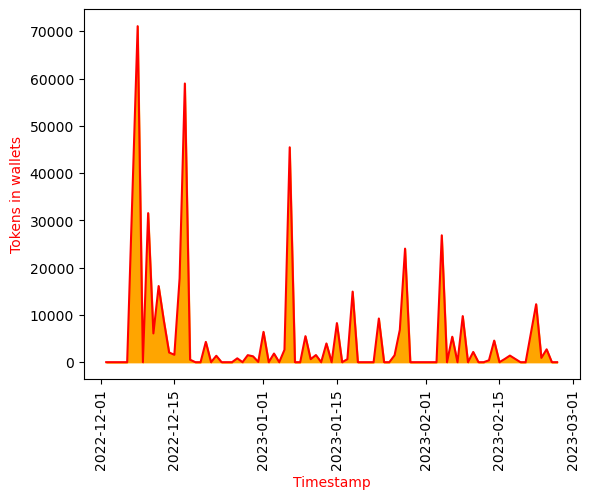

In [109]:
x = result_df['date_only']
y = result_df['SPOT_total($)']

plt.fill_between(x, y, color='orange')
plt.plot(x, y, color = 'r')
plt.xlabel('Timestamp', color = 'r')
plt.ylabel('Tokens in wallets', color = 'r')
plt.xticks(rotation=90)
plt.show()